In [2]:
%matplotlib inline


# Busqueda de picos en Timeseries



Se buscaran los minimos y máximos de un timeseries



In [3]:
from sunpy.net import Fido, attrs as a

import numpy as np
import matplotlib.pyplot as plt

from sunpy.timeseries import TimeSeries
from __future__ import print_function, division

import datetime
import copy
from collections import OrderedDict

import numpy as np
from pandas import DataFrame

import astropy.units as u
from astropy.time import Time
from astropy.table import Table

import sunpy.data.sample
import sunpy.timeseries
from sunpy.util.metadata import MetaDict
from sunpy.time import TimeRange, parse_time

In [4]:
tr = TimeRange(['2011', '2014'])

resultsXRS = Fido.search(a.Time(tr.start, tr.end), a.Instrument('XRS'))
resultsXRS

filesXRS = Fido.fetch(resultsXRS, path='/home/yasser/Documents//HorasAsistenteB7088')
print(filesXRS)
goes = TimeSeries(filesXRS, source='XRS')
goes.peek()

print (goes.data)

ValueError: '2011' is not a valid time string!

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


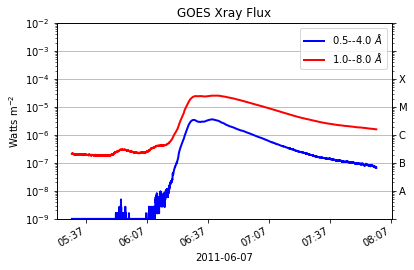

In [4]:
my_timeseries = goes.truncate('2011-06-07 05:30', '2011-06-07 08:00')
my_timeseries.peek()


Función findpeaks, que toma una serie de datos y busca los mínimos y máximos. Requiere un valor DELTA para 


In [5]:
def findpeaks(series, DELTA):
    # Set inital values
    mn, mx = np.Inf, -np.Inf
    minpeaks = []
    maxpeaks = []
    lookformax = True
    start = True
    # Iterate over items in series
    for time_pos, value in series.iteritems():
        if value > mx:
            mx = value
            mxpos = time_pos
        if value < mn:
            mn = value
            mnpos = time_pos
        if lookformax:
            if value < mx-DELTA:
                # a local maxima
                maxpeaks.append((mxpos, mx))
                mn = value
                mnpos = time_pos
                lookformax = False
            elif start:
                # a local minima at beginning
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                start = False
        else:
            if value > mn+DELTA:
                # a local minima
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                lookformax = True
    # check for extrema at end
    if value > mn+DELTA:
        maxpeaks.append((mxpos, mx))
    elif value < mx-DELTA:
        minpeaks.append((mnpos, mn))
    return minpeaks, maxpeaks

2011-06-07 05:30:01.818999    2.149400e-07
2011-06-07 05:30:03.868999    2.175700e-07
2011-06-07 05:30:05.914999    2.149400e-07
2011-06-07 05:30:07.964999    2.149400e-07
2011-06-07 05:30:10.011999    2.149400e-07
2011-06-07 05:30:12.058999    2.175700e-07
2011-06-07 05:30:14.108999    2.097000e-07
2011-06-07 05:30:16.154999    2.149400e-07
2011-06-07 05:30:18.201999    2.149400e-07
2011-06-07 05:30:20.251999    2.201900e-07
2011-06-07 05:30:22.298999    2.123200e-07
2011-06-07 05:30:24.348999    2.149400e-07
2011-06-07 05:30:26.394999    2.149400e-07
2011-06-07 05:30:28.441999    2.123200e-07
2011-06-07 05:30:30.491999    2.123200e-07
2011-06-07 05:30:32.538999    2.149400e-07
2011-06-07 05:30:34.588999    2.123200e-07
2011-06-07 05:30:36.634999    2.070700e-07
2011-06-07 05:30:38.681999    2.123200e-07
2011-06-07 05:30:40.731999    2.070700e-07
2011-06-07 05:30:42.778999    2.123200e-07
2011-06-07 05:30:44.828999    2.070700e-07
2011-06-07 05:30:46.874999    2.097000e-07
2011-06-07 

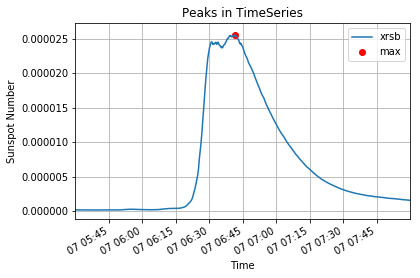

In [6]:
series = my_timeseries.data['xrsb']
print (series)
minpeaks, maxpeaks = findpeaks(series, DELTA=0.000001)

print (minpeaks)
print (maxpeaks)

# Plotting the figure and extremum points
plt.figure()
plt.ylabel('Sunspot Number')
plt.xlabel('Time')
plt.title('Peaks in TimeSeries')
series.plot()
plt.scatter(*zip(*maxpeaks), color='red', label='max')
#plt.scatter(*zip(*minpeaks), color='green', label='min')
plt.legend()
plt.grid(True)
plt.show()